In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
#Read the data file
from google.colab import files
uploaded=files.upload()

Saving german_credit_data1.csv to german_credit_data1.csv


In [5]:
df=pd.read_csv("german_credit_data1.csv")

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522 entries, 1 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        522 non-null    int64 
 1   Age               522 non-null    int64 
 2   Sex               522 non-null    object
 3   Job               522 non-null    int64 
 4   Housing           522 non-null    object
 5   Saving accounts   522 non-null    object
 6   Checking account  522 non-null    object
 7   Credit amount     522 non-null    int64 
 8   Duration          522 non-null    int64 
 9   Purpose           522 non-null    object
 10  Risk              522 non-null    object
dtypes: int64(5), object(6)
memory usage: 48.9+ KB


In [9]:
df=pd.get_dummies(df, columns=['Sex','Housing','Saving accounts','Checking account','Purpose','Risk'])
X=df[list(df)[1:9]]
y=df['Risk_good']


In [10]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [11]:
# 2.4.1 Instantiate object
ss = StandardScaler()

# 2.4.2 Train object on data
ss.fit(X)

# 2.4.3 Trandform data
X = ss.transform(X)

In [14]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(349, 8) (173, 8) (349,) (173,)


In [15]:
#chnge IMP
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)
#N_estimator is number of decision trees. imp to give value else not run

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [16]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5780346820809249


In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[33, 41],
       [32, 67]])

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.45      0.47        74
           1       0.62      0.68      0.65        99

    accuracy                           0.58       173
   macro avg       0.56      0.56      0.56       173
weighted avg       0.57      0.58      0.57       173



In [19]:
#Finding Important Features in Scikit-learn
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(df)[1:9]).sort_values(ascending=False)
feature_imp

Credit amount    0.367857
Age              0.243097
Duration         0.228428
Job              0.079244
Housing_own      0.038014
Sex_female       0.015914
Housing_free     0.014016
Sex_male         0.013431
dtype: float64

In [33]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
#from urllib.request import urlopen 

No handles with labels found to put in legend.


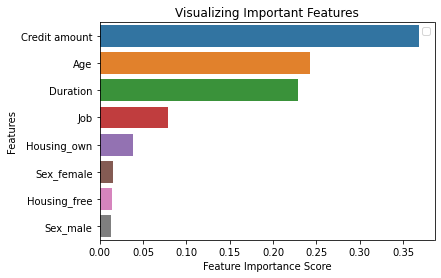

In [31]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [82]:
df['Duration'].unique()

array([48, 42, 24, 36, 30, 12, 15,  6, 10,  7, 60, 18, 45,  9, 27,  8, 11,
       54, 14, 33, 21, 16, 47, 13, 39, 20, 26, 72, 40, 28])

In [69]:
#Generating the Model on Selected Features
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=df[['Age','Credit amount','Duration']]  # Removed feature "housing fee"
y=df['Risk_good']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [70]:
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6311475409836066


In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.60      0.59       164
           1       0.67      0.65      0.66       202

    accuracy                           0.63       366
   macro avg       0.63      0.63      0.63       366
weighted avg       0.63      0.63      0.63       366



In [72]:
#You can also make a prediction for a single item, for example:

clf.predict([[22, 3959, 24]])

#Here, 2 indicates the flower type Virginica.

array([1], dtype=uint8)

In [26]:
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
#from urllib.request import urlopen 

In [27]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

In [83]:
import time
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [52, 503, 30],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(X_train, y_train)
print('Best Parameters using grid search: \n', 
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 52, 'max_features': None}
Time taken in grid search:  37.12


In [84]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

RandomForestClassifier(max_depth=2, n_estimators=50, random_state=42)

In [85]:
#Train the model using the training sets y_pred=clf.predict(X_test)
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6229508196721312


In [86]:
fit_rf.set_params(criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 2,
                 n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
fit_rf.fit(X_train,y_train)

# prediction on test set
y_pred=fit_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6229508196721312
